In [2]:
!python -m pip install pandas_datareader

In [76]:
!python -m pip install TensorFlow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Attempting

In [15]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd 
import numpy as np 
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn import datasets
import seaborn as sns  # Bibliothèque pour la visualisation des données
import tensorflow.compat.v1 as tf
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [3]:
start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)
sp_data = pdr.DataReader('^GSPC', 'yahoo', start, end)
sp_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [5]:
#sp_data.to_csv(r'C:\Users\Hajar\Desktop\S4\ML\Projet\sp_data.csv', index = True)
sp_data= pd.read_csv(r'C:\Users\Hajar\Desktop\S4\ML\Projet\RNA_S&P500\sp_data.csv', index_col='Date', parse_dates=True)
# Change to datetime datatype.
#sp_data.loc[:, 'Date'] = pd.to_datetime(sp_data.loc[:,'Date'], format="%Y/%m/%d")

In [6]:
sp_data.head()
sp_data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2004-12-17', '2004-12-20', '2004-12-21', '2004-12-22',
               '2004-12-23', '2004-12-27', '2004-12-28', '2004-12-29',
               '2004-12-30', '2004-12-31'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)

<AxesSubplot:xlabel='Date'>

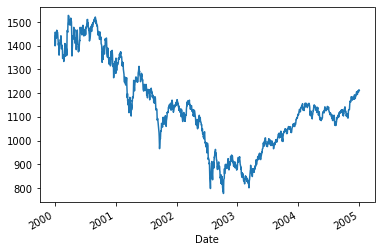

In [7]:
# Simple plotting of Amazon Stock Price

# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# # First Subplot:"Close Price History"
# ax1.plot(sp_data["Date"], sp_data["Close"], color="blue")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")
# ax1.set_title("Close-High-low Price History")

# # Second Subplot:"High Price History"
# ax1.plot(sp_data["Date"], sp_data["High"], color="green")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")

# # Third Subplot:Low Price History"
# ax1.plot(sp_data["Date"], sp_data["Low"], color="red")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")

# # Fourth Subplot:"Volume History"
# ax2.plot(sp_data["Date"], sp_data["Volume"], color="orange")
# ax2.set_xlabel("Date", fontsize=12)
# ax2.set_ylabel("Stock Price")
# ax2.set_title("Volume History")
# plt.show()
sp_data['Close'].plot()

In [49]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_array = scaler.fit_transform(sp_data)

# df2 = pd.DataFrame(sp_data.index)
# df['Close'] = scaled_array.tolist()
df = pd.DataFrame(scaled_array, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df.index = sp_data.index

df.head()
# plt.plot(scaled_array)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454


In [50]:
scaled_array[0]

array([0.90074505, 0.89317581, 0.92245909, 0.90376982, 0.23795511,
       0.90376982])

In [51]:
df['2000': '2004']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454
...,...,...,...,...,...,...
2004-12-27,0.550933,0.581852,0.577288,0.570348,0.233905,0.570348
2004-12-28,0.550151,0.581852,0.570348,0.581830,0.259117,0.581830
2004-12-29,0.550562,0.589894,0.581830,0.581710,0.235517,0.581710


In [52]:
#tf.disable_v2_behavior()
df = df.values
#df = df.reshape(-1, 1)
df

array([[0.90074505, 0.89317581, 0.92245909, 0.90376982, 0.23795511,
        0.90376982],
       [0.87054563, 0.83859019, 0.90376982, 0.82943929, 0.26986266,
        0.82943929],
       [0.81493269, 0.81225089, 0.82943929, 0.83302253, 0.30148089,
        0.83302253],
       ...,
       [0.55056207, 0.58989367, 0.58183037, 0.58171036, 0.23551658,
        0.58171036],
       [0.55403539, 0.59317453, 0.58171036, 0.5818437 , 0.19579746,
        0.5818437 ],
       [0.55517547, 0.59082731, 0.5818437 , 0.57967239, 0.17806645,
        0.57967239]])

In [53]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [65]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, :6])
        y.append(df[i, :6])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [71]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [76]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

In [81]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=6))

In [82]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

In [83]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [84]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
30/30 [==============================] - 26s 210ms/step - loss: 0.1025
Epoch 2/50
30/30 [==============================] - 6s 210ms/step - loss: 0.0117
Epoch 3/50
30/30 [==============================] - 6s 208ms/step - loss: 0.0092
Epoch 4/50
30/30 [==============================] - 6s 211ms/step - loss: 0.0102
Epoch 5/50
30/30 [==============================] - 7s 218ms/step - loss: 0.0092
Epoch 6/50
30/30 [==============================] - 7s 223ms/step - loss: 0.0081
Epoch 7/50
30/30 [==============================] - 7s 225ms/step - loss: 0.0076
Epoch 8/50
30/30 [==============================] - 6s 212ms/step - loss: 0.0068
Epoch 9/50
30/30 [==============================] - 6s 214ms/step - loss: 0.0071
Epoch 10/50
30/30 [==============================] - 6s 216ms/step - loss: 0.0068
Epoch 11/50
30/30 [==============================] - 7s 223ms/step - loss: 0.0070
Epoch 12/50
30/30 [==============================] - 7s 225ms/step - loss: 0.0070
Epoch 13/50
30/30 [=====

In [85]:
model = load_model('stock_prediction.h5')

In [94]:
predictions = model.predict(x_test)
# predictions.shape
predictions = scaler.inverse_transform(predictions)
df_Result = pd.DataFrame(predictions, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df_Result.index = sp_data.index[1054:]
df_Result
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# fig, ax = plt.subplots(figsize=(16,8))
# ax.set_facecolor('#ffffff')
# ax.plot(y_test, color='red', label='Original price')
# plt.plot(predictions, color='cyan', label='Predicted price')
# plt.legend()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-03-16,1119.224121,1103.151611,1112.364990,1110.627563,1.318459e+09,1111.199829
2004-03-17,1115.134033,1099.079102,1108.396973,1106.798706,1.327434e+09,1107.238403
2004-03-18,1115.208862,1099.280518,1108.688843,1107.354126,1.324904e+09,1107.432861
2004-03-19,1118.827637,1103.103271,1112.568237,1111.552246,1.312458e+09,1111.143066
2004-03-22,1122.202271,1106.639526,1116.118652,1115.321167,1.299444e+09,1114.579712
...,...,...,...,...,...,...
2004-12-27,1212.056519,1195.401978,1205.070557,1204.983398,1.238715e+09,1203.385620
2004-12-28,1222.222900,1205.781982,1215.490967,1215.549316,1.212203e+09,1213.635498
2004-12-29,1228.897095,1212.652344,1222.373291,1222.400879,1.188683e+09,1220.444336


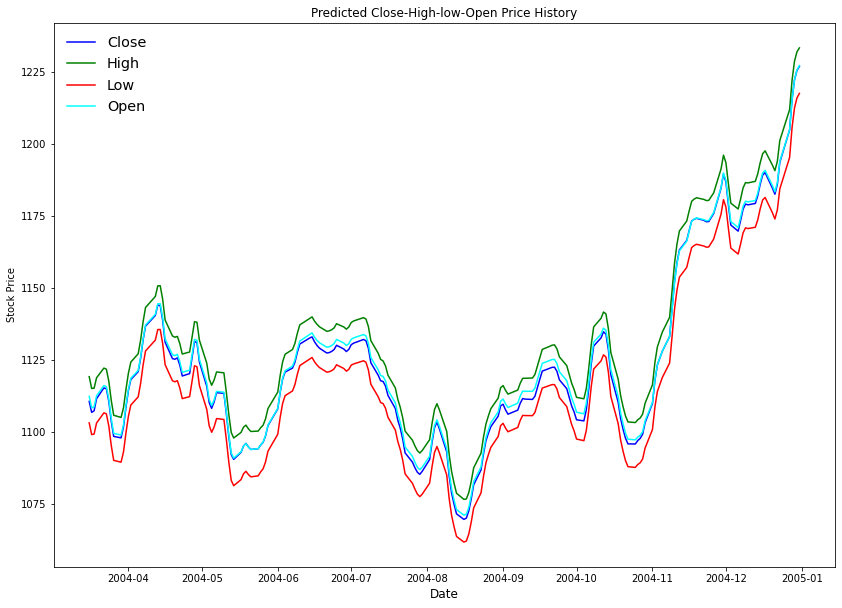

In [129]:
# Simple plotting of Amazon Stock Price

f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(df_Result.index, df_Result["Close"], color="blue", label='Close')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Predicted Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["High"], color="green", label='High')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax1.plot(df_Result.index, df_Result["Low"], color="red", label='Low')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax1.plot(df_Result.index, df_Result["Open"], color="cyan", label='Open')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

ax1.legend(loc='upper left', frameon=False, fontsize='x-large')


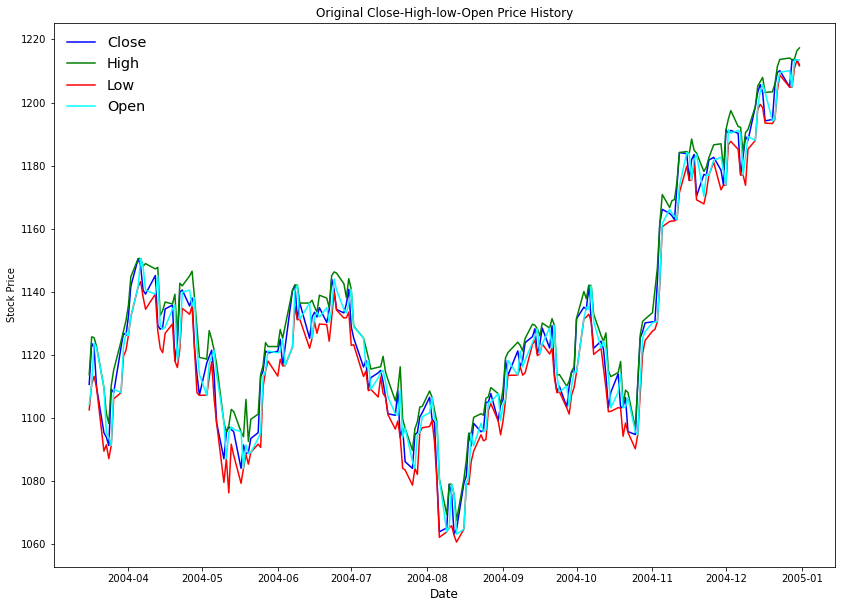

In [130]:
#original plot
# Simple plotting of Amazon Stock Price

f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue",label='Close')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Original Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="green",label='High')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="red",label='Low')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="cyan",label='Open')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

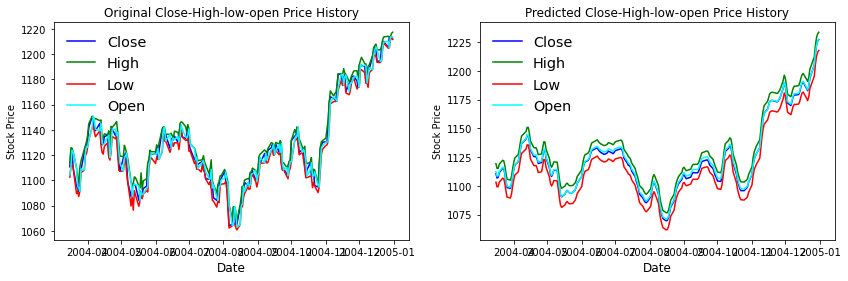

In [126]:
# Simple plotting of Amazon Stock Price

g, (bx1, bx2) = plt.subplots(1,2, figsize=(14,4))

# First Subplot:"Close Price History"
bx1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue", label='Close')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.set_title("Original Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="green", label='High')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="red", label='Low')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="cyan", label='Open')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.legend(loc='upper left', frameon=False, fontsize='x-large')

#-----------------------------------------OriginaL----------------------------------
# First Subplot:"Close Price History"
bx2.plot(df_Result.index, df_Result["Close"], color="blue", label='Close')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.set_title("Predicted Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx2.plot(df_Result.index, df_Result["High"], color="green", label='High')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx2.plot(df_Result.index, df_Result["Low"], color="red", label='Low')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx2.plot(df_Result.index, df_Result["Open"], color="cyan" , label='Open')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.legend(loc='upper left', frameon=False, fontsize='x-large')



# Fourth Subplot:"Volume History"
# ax2.plot(df_Result.index, df_Result["Volume"], color="orange")
# ax2.set_xlabel("Date", fontsize=12)
# ax2.set_ylabel("Stock Price")
# ax2.set_title("Volume History")
plt.show()

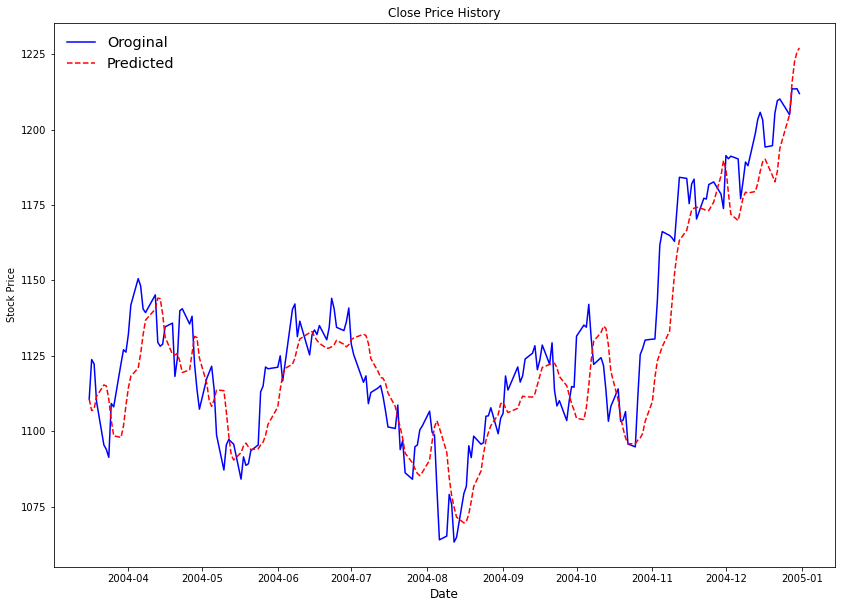

In [120]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue", label ='Oroginal')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Close Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["Close"], 'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

Text(0, 0.5, 'Stock Price')

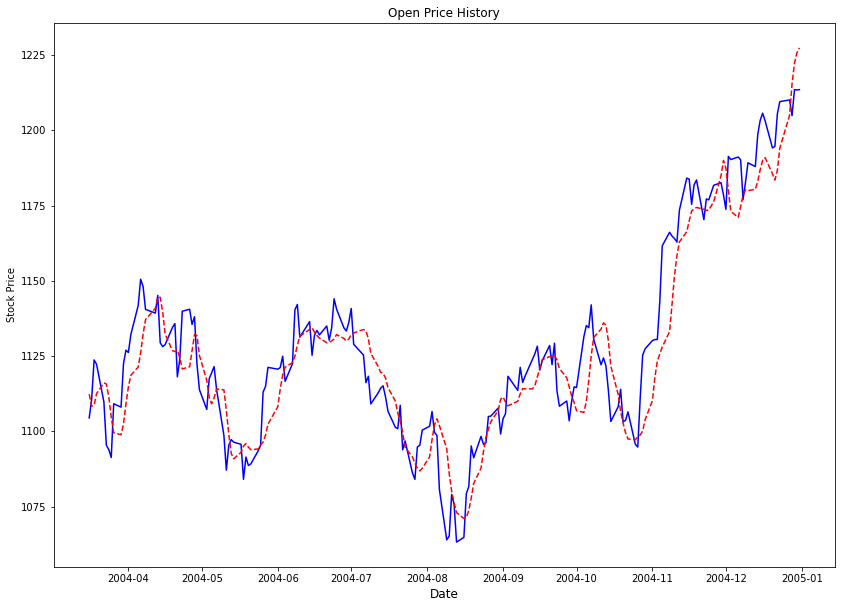

In [121]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Open Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["Open"], 'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

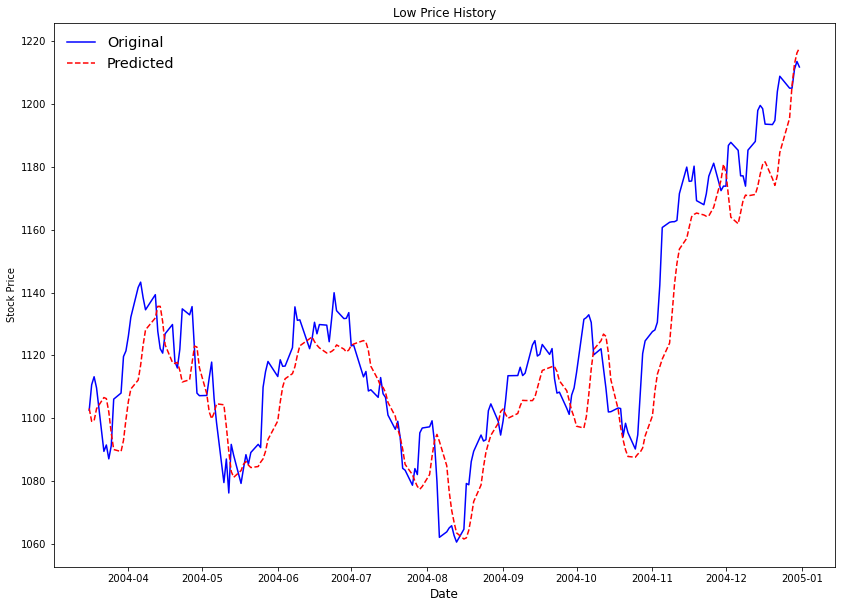

In [122]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["Low"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

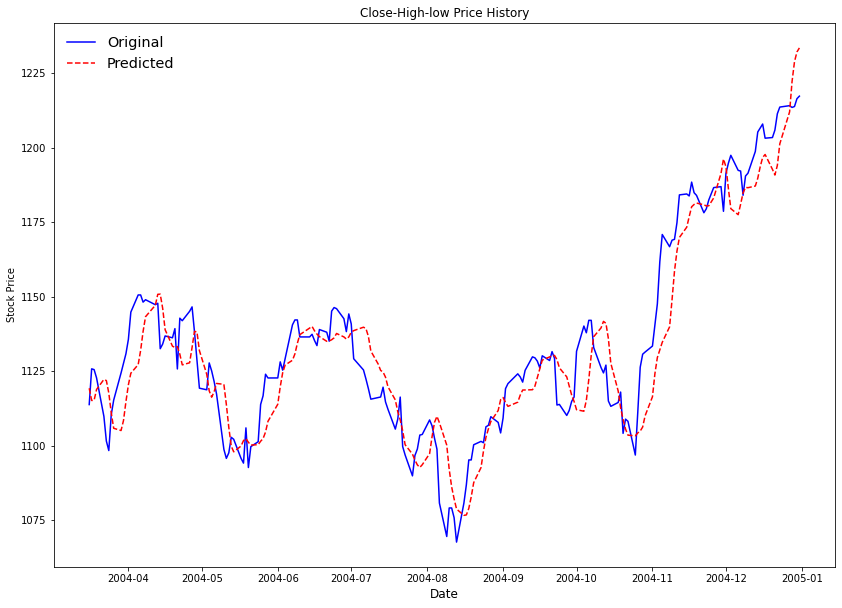

In [118]:
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Close-High-low Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["High"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')